# Advanced Lane Lines Project

This is an improvement for project #1 where we just maked the lane lines, but without caring for the radius or the relative position of the car.

The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle
position.

### Camera Calibration
1. Have the camera matrix and distortion coefficients been computed correctly and
checked on one of the calibration images as a test?

In [1]:
## Get all the needed imports
import pickle
import matplotlib.pyplot as plt
import cv2
from glob import glob
import matplotlib.image as mpimage
import numpy as np
# all the pyploy images print them in this page
%matplotlib inline

## Generic fuction to show an array of images
def plot_imgArr(img_arr, label=None, predict=None, gray=False, n=2):
    """
    :img_arr: An iterable list of images
    :label: The title of the image
    :gray: True if the image is to be shown in black and white
    :n: The number of 2 image rows.
    """
    f, arr = plt.subplots(n,2)
    print(img_arr[0].shape)
    for n, subplt in enumerate(arr.reshape(-1)):
        if gray:
            subplt.imshow(img_arr[n],  cmap='gray')
        else:
            subplt.imshow(img_arr[n])
        subplt.axis('off')
        if label is not None and predict is None:
            subplt.set_title("st: "+str(label[n]))
        elif label is not None and predict is not None:
            subplt.set_title("st:"+str(label[n]) + "p:"+str(predict[n]))
    plt.show()


Verify current location:

In [2]:
%pwd

'/home/porko/workspace/nd_selfDrive/CarND-Advanced-Lane-Lines'

Get the points to calibrate the camera:

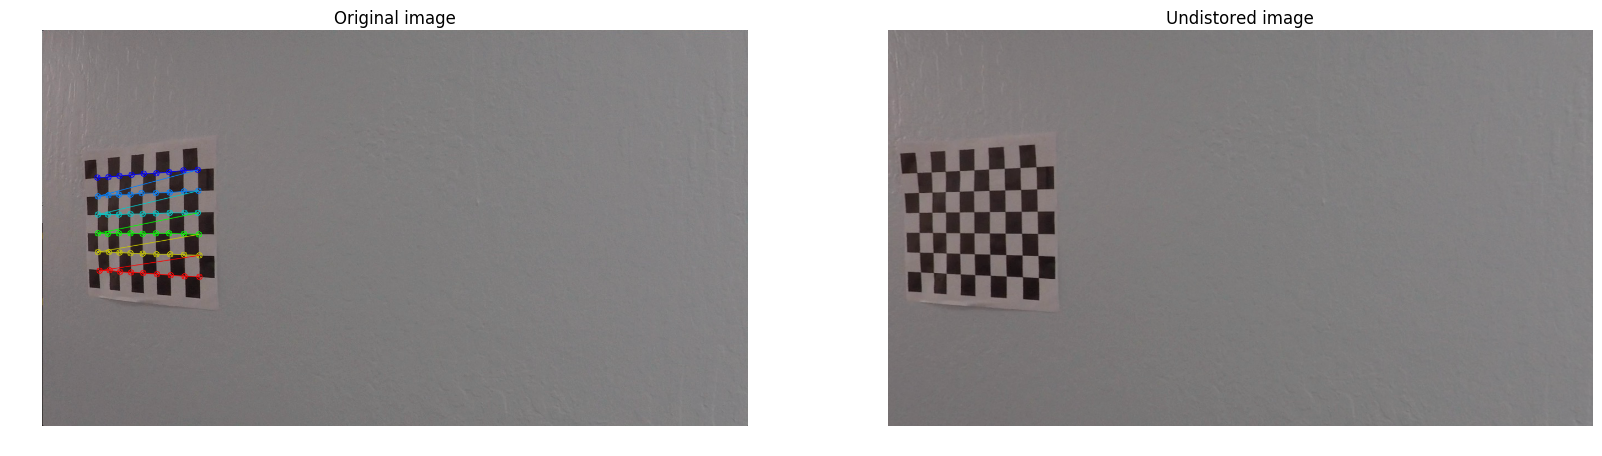

In [3]:
# get all the images from the camera_cal folder
# from: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
"""
Parameters and constats
"""
# Number of corners in x
nx = 9
# Number of corners in y
ny = 6
# Pickle file path 
CAMERA_UNDISTORT_FILE = "/home/porko/workspace/nd_selfDrive/CarND-Advanced-Lane-Lines/output_images/calibration/"
# Pickle file name
CAMERA_PICKLE_NAME = "camera_undist.p"
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
imgs = glob("camera_cal/calibration*")

img_list = []
for path_img in imgs:
    img = cv2.imread(path_img)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(g_img, (nx,ny))
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, True)
        img_list.append(img.copy())


# This function returns the camera matrix (mtx), distortion coefficients and rotation and translation vectors
h,w = img_list[0].shape[:2]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (h,w),None,None)
# refine the matrix with the open cv function
## Why not user getOptimalNewCameraMatrix?
#newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
#x,y,w,h = roi
img_list_und = []

for n, path_img in enumerate(imgs):
    img = cv2.imread(path_img)
    # in case we want to use getOptimalNewCameraMatrix change the second mtx for newcameramtx
    dst = cv2.undistort(img, mtx, dist, None, mtx) 
    # 
    img_list_und.append(dst)
    cv2.imwrite('./output_images/calibration/calibresult_'+str(n)+'.jpg',dst)
    
f,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title("Original image")
ax1.axis('off')
ax1.imshow(img_list[0])

ax2.set_title("Undistored image")
ax2.axis('off')
ax2.imshow(img_list_und[0])


Once we are satisfied with the coefficients, save them into a pickle file.

In [4]:
camera_undist = {"mtx": mtx, "dist":dist}
pickle.dump(camera_undist, open(CAMERA_UNDISTORT_FILE+CAMERA_PICKLE_NAME, "wb"))

### Pipeline (single images)

#### Distortion correction.
Has the distortion correction been correctly applied to each image?

#### Color transformation and gradients
Has a binary image been created using color transforms, gradients or other methods?

Has a perspective transform been applied to rectify the image?

Have lane line pixels been identified in the rectified image and fit with a polynomial?

Having identified the lane lines, has the radius of curvature of the road been estimated?
And the position of the vehicle with respect to center in the lane?

### Pipeline (video)

## Discussion